<a href="https://colab.research.google.com/github/k4404c/tensorflow_workbook/blob/main/tensorflow3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
### computer vision with tensorflow

In [5]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-12 01:51:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.7.59, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   176MB/s    in 0.6s    

2024-05-12 01:51:22 (176 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [6]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [7]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_rand_img(target_dir, target_class):
  target_folder= target_dir+target_class
  random_img = random.sample(os.listdir(target_folder) , 1)

  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape : {img.shape}")

  return img

Image shape : (512, 512, 3)


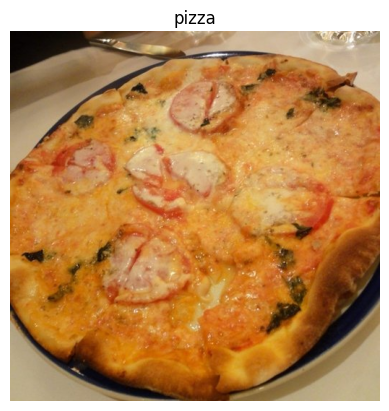

In [9]:
img = view_rand_img(target_dir='pizza_steak/train/', target_class='pizza')

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[208, 186, 222],
        [211, 187, 221],
        [214, 187, 222],
        ...,
        [ 66,  69,  78],
        [ 66,  65,  71],
        [ 64,  62,  67]],

       [[208, 186, 224],
        [209, 185, 221],
        [210, 183, 218],
        ...,
        [ 64,  67,  76],
        [ 68,  67,  73],
        [ 72,  70,  75]],

       [[205, 184, 223],
        [203, 181, 219],
        [202, 176, 213],
        ...,
        [ 59,  63,  74],
        [ 67,  67,  75],
        [ 78,  77,  83]],

       ...,

       [[193, 134,  90],
        [193, 134,  90],
        [188, 126,  85],
        ...,
        [160, 137, 106],
        [165, 142, 111],
        [162, 139, 107]],

       [[193, 134,  90],
        [191, 132,  88],
        [185, 123,  82],
        ...,
        [155, 130, 100],
        [163, 138, 108],
        [163, 138, 107]],

       [[193, 134,  90],
        [189, 130,  86],
        [183, 121,  80],
        ...,
        [152, 127,  9

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
img/255

array([[[0.94117647, 0.89411765, 0.89411765],
        [0.90980392, 0.8627451 , 0.8627451 ],
        [0.90196078, 0.8627451 , 0.86666667],
        ...,
        [0.6745098 , 0.52941176, 0.36470588],
        [0.67058824, 0.5372549 , 0.36078431],
        [0.67843137, 0.54509804, 0.36862745]],

       [[0.96078431, 0.91372549, 0.91372549],
        [0.91764706, 0.87058824, 0.87058824],
        [0.90588235, 0.86666667, 0.87058824],
        ...,
        [0.67843137, 0.53333333, 0.36862745],
        [0.65882353, 0.5254902 , 0.34901961],
        [0.65490196, 0.52156863, 0.34509804]],

       [[0.98039216, 0.94117647, 0.94509804],
        [0.92941176, 0.89019608, 0.89411765],
        [0.91372549, 0.8745098 , 0.87843137],
        ...,
        [0.70196078, 0.55686275, 0.39215686],
        [0.6745098 , 0.5372549 , 0.37254902],
        [0.6627451 , 0.5254902 , 0.36078431]],

       ...,

       [[0.10980392, 0.09019608, 0.10588235],
        [0.09803922, 0.07843137, 0.09411765],
        [0.09411765, 0

In [ ]:
#lets build a CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#import data, turn into batches
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224, 3)),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'
                           ),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model1.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

#his1 = model1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
his1 = model1.fit(train_data,
                  epochs = 5,
                  steps_per_epoch = len(train_data),
                  validation_data = valid_data,
                  validation_steps = len(valid_data)
                  )

Epoch 1/5
47/47 [==============================] - 111s 2s/step - loss: 0.5896 - accuracy: 0.6873 - val_loss: 0.4009 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.4352 - accuracy: 0.8007 - val_loss: 0.4056 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 106s 2s/step - loss: 0.3935 - accuracy: 0.8340 - val_loss: 0.3489 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 105s 2s/step - loss: 0.3599 - accuracy: 0.8413 - val_loss: 0.3283 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 105s 2s/step - loss: 0.2846 - accuracy: 0.8900 - val_loss: 0.3453 - val_accuracy: 0.8340


In [ ]:
#really slow, lets speed it up with a GPU

In [9]:
model1.summary() #observe pattern of cov2d and pooling

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [15]:
#trying pre model for img data

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),

])

model2.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['Accuracy'])

his2 = model2.fit(train_data,
                  epochs = 5,
                  steps_per_epoch = len(train_data),
                  validation_data = valid_data,
                  validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 128ms/step - loss: 0.7126 - Accuracy: 0.5113 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - Accuracy: 0.5000 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - Accuracy: 0.5000 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - Accuracy: 0.5000 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - Accuracy: 0.5000 - val_loss: 0.6931 - val_Accuracy: 0.5000


In [16]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
#despite having 20x more paramaters, model2 sucks


model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),

])

model3.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['Accuracy'])

his3 = model3.fit(train_data,
                  epochs = 5,
                  steps_per_epoch = len(train_data),
                  validation_data = valid_data,
                  validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 3.1358 - Accuracy: 0.6313 - val_loss: 1.1201 - val_Accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 1.2362 - Accuracy: 0.6727 - val_loss: 0.5422 - val_Accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5472 - Accuracy: 0.7633 - val_loss: 0.4429 - val_Accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6111 - Accuracy: 0.7500 - val_loss: 0.6261 - val_Accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4823 - Accuracy: 0.7800 - val_loss: 0.4217 - val_Accuracy: 0.7980


In [18]:
model3.summary(). #500x more paramaters than model1, still worse

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape : (512, 512, 3)
Image shape : (512, 512, 3)


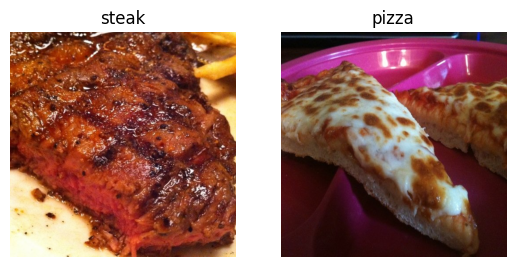

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_rand_img('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_rand_img('pizza_steak/train/', 'pizza')


In [11]:
#preprocessing

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#turn data into batches
#create train and test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #normalizes pixels
test_datagen = ImageDataGenerator(rescale=1./255) #normalizes pixels



In [12]:
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32) #gets images from directory using datagen

test_data = test_datagen.flow_from_directory(directory= test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
#get a sample of a  train data batch
images, labels = train_data.next() #get the "next" batch of imgs/labels
len(images), len(labels)

(32, 32)

In [25]:
len(train_data) #num of batches (rounded up)

47

In [26]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [33]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

his4 = model4.fit(train_data,
           epochs=5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 137ms/step - loss: 0.7719 - accuracy: 0.6427 - val_loss: 0.6242 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4675 - accuracy: 0.7873 - val_loss: 0.3804 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3215 - accuracy: 0.8640 - val_loss: 0.3772 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 8s 165ms/step - loss: 0.2081 - accuracy: 0.9387 - val_loss: 0.3603 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.0917 - accuracy: 0.9787 - val_loss: 0.3991 - val_accuracy: 0.8120


In [32]:
model1.evaluate(test_data)
model4.evaluate(test_data)

#model 1 still slightly better

16/16 [==============================] - 1s 84ms/step - loss: 0.3920 - accuracy: 0.8480


[0.3920179605484009, 0.8479999899864197]

<Axes: >

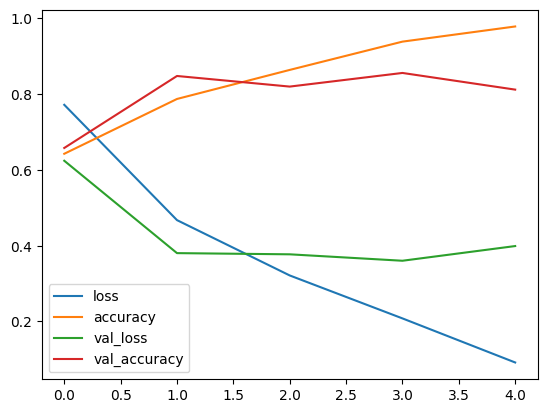

In [34]:
pd.DataFrame(his4.history).plot()

In [42]:
def plot_loss(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #num of epochs

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

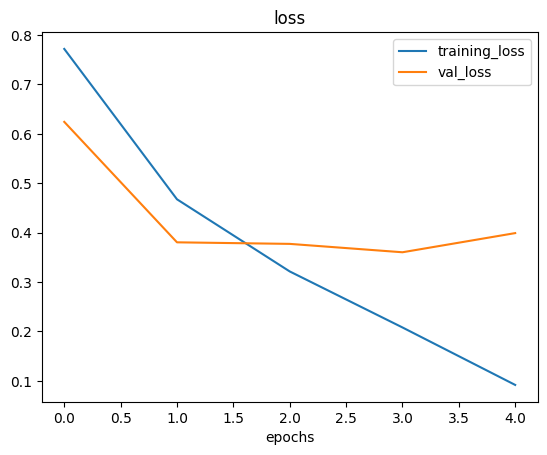

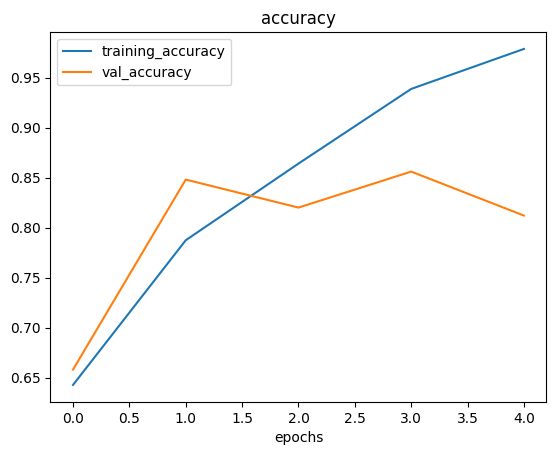

In [38]:
plot_loss(his4)

In [ ]:
#when a models validation loss starts to INCREASE, it is likely that the model is OVERFITTING

In [13]:
#reducing overfitting:
#add regularization layers (such as MaxPool2D)
import tensorflow as tf

model5= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

his5 = model5.fit(train_data,
           epochs=5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.5978 - accuracy: 0.6887 - val_loss: 0.4936 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.4567 - accuracy: 0.7880 - val_loss: 0.3754 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4271 - accuracy: 0.8047 - val_loss: 0.3667 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 49s 1s/step - loss: 0.3945 - accuracy: 0.8240 - val_loss: 0.3479 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 46s 978ms/step - loss: 0.3775 - accuracy: 0.8327 - val_loss: 0.3421 - val_accuracy: 0.8500


In [14]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

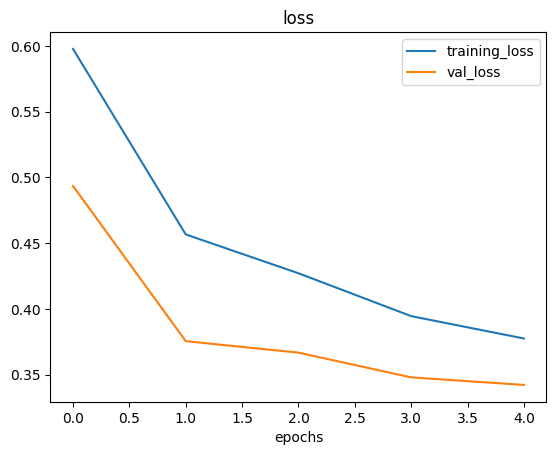

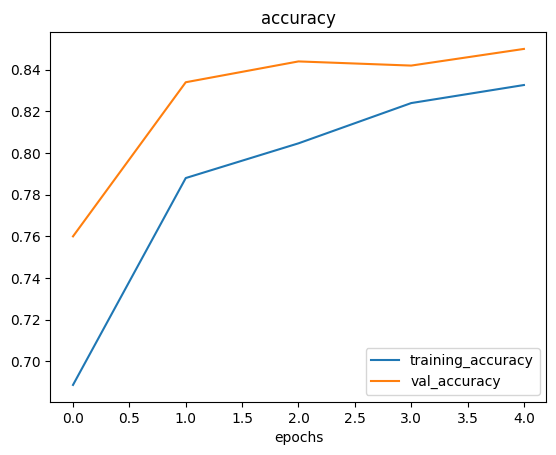

In [17]:
#despite having less paramaters (halved when we max pool) our validation accuracy is higher
plot_loss(his5)

In [ ]:
#reduce overfitting is also called regularization

In [18]:
#create ImageDataGenerator training instance with data augmentation

train_datagen_aug = ImageDataGenerator(rescale = 1./255,
                                       rotation_range=0.2,
                                       shear_range = 0.2,
                                       zoom_range=0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.3,
                                       horizontal_flip = True)

#Data Generator without augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

#Data Augmentation is process of altering our training data to have more diversity and generalizability
#(rotating, cropping, flipping) so it is more able to do well in sets outside of traning



In [30]:
#visualizing data augmentation
print("Augmented Data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       class_mode = "binary",
                                                       shuffle = False
                                                       )
print("non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       class_mode = "binary",
                                                       shuffle = False
                                                       )
print("Test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = "binary"
                                             )



Augmented Data
Found 1500 images belonging to 2 classes.
non augmented training data
Found 1500 images belonging to 2 classes.
Test Data
Found 500 images belonging to 2 classes.


In [32]:
images, labels = train_data.next()
aug_img, aug_labels = train_data_aug.next()



Text(0.5, 1.0, 'augmented img')

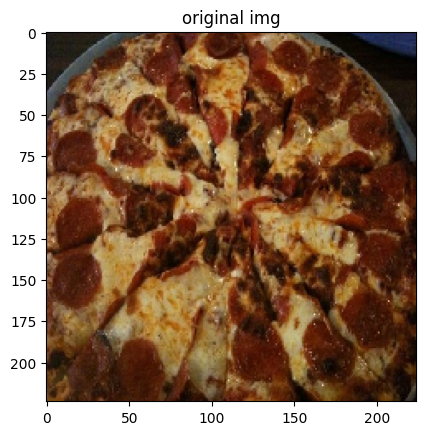

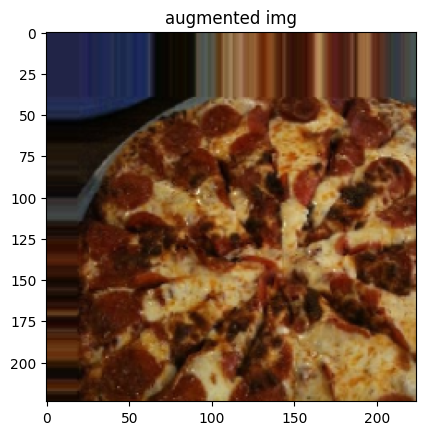

In [38]:
rand_num = random.randint(0,32)

plt.imshow(images[rand_num])
plt.title("original img")
plt.figure()
plt.imshow(aug_img[rand_num])
plt.title("augmented img")

In [39]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       class_mode = "binary",
                                                       shuffle = True
                                                       )

Found 1500 images belonging to 2 classes.


In [41]:
import tensorflow as tf

model6= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

his6 = model6.fit(train_data_aug,
           epochs=5,
           steps_per_epoch = len(train_data_aug),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 79s 2s/step - loss: 0.6261 - accuracy: 0.6407 - val_loss: 0.5084 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.5357 - accuracy: 0.7293 - val_loss: 0.4587 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.5312 - accuracy: 0.7313 - val_loss: 0.3688 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 71s 1s/step - loss: 0.4855 - accuracy: 0.7720 - val_loss: 0.3628 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.5043 - accuracy: 0.7633 - val_loss: 0.4096 - val_accuracy: 0.8120


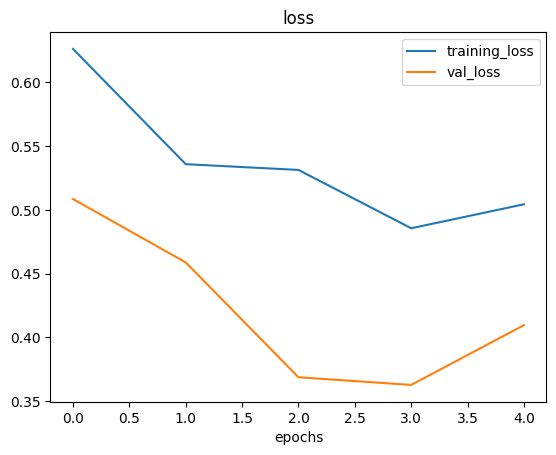

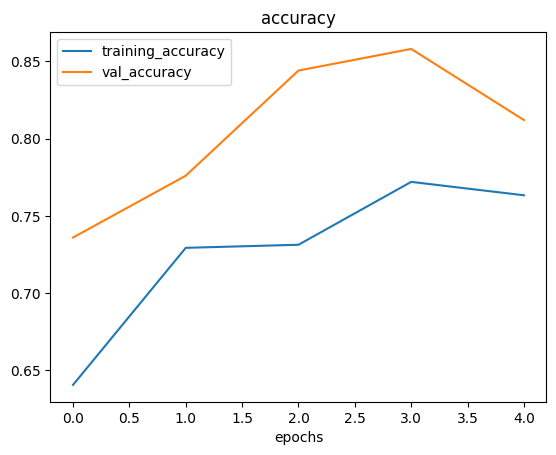

In [42]:
plot_loss(his6)

In [ ]:
#exploring options to improve model


--2024-05-12 02:43:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2024-05-12 02:43:46 (21.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



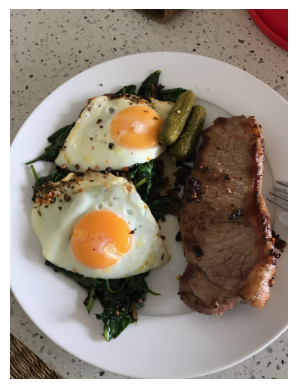

In [43]:
#making a prediction on our own custom data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [44]:
steak.shape

(4032, 3024, 3)

In [45]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [46]:
model6.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


In [48]:
steak = tf.expand_dims(steak, axis = 0)
steak.shape

TensorShape([1, 4032, 3024, 3])

In [49]:
def load_and_prep_img(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img



In [51]:
steak = load_and_prep_img("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [52]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

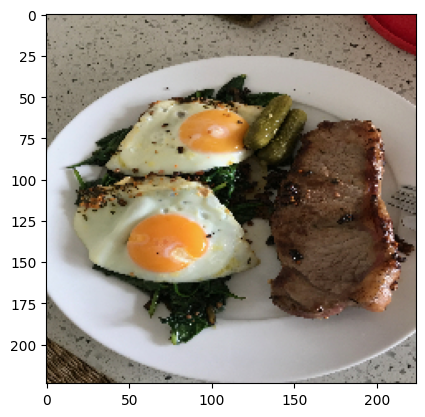

In [53]:
plt.imshow(steak)

In [54]:
model6.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [57]:
pred = model6.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 102ms/step


In [59]:
class_names = ['pizza', 'steak']

pred_class = class_names[int(tf.round(pred))]
print(pred_class)

steak


In [59]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_img(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  print(pred)
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 74ms/step
[[0.921943]]


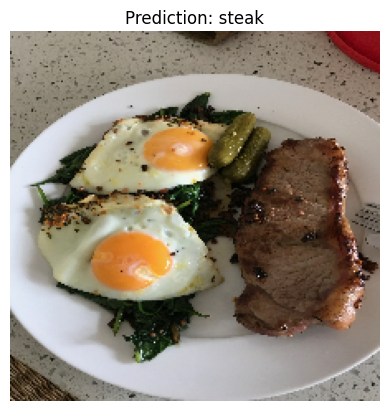

In [69]:
filename = "03-steak.jpeg"
pred_and_plot(model = model6, filename=filename)

--2024-05-12 03:01:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2024-05-12 03:01:53 (26.1 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]

1/1 [==============================] - 0s 69ms/step
[[0.720316]]


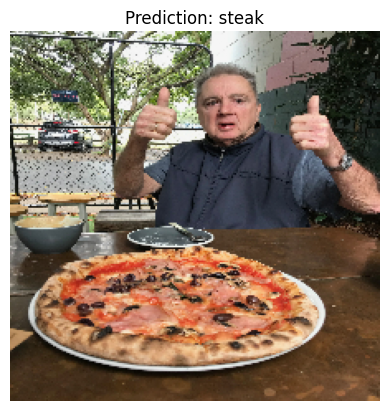

In [70]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model6, "03-pizza-dad.jpeg", class_names)

In [1]:
#Multiclass Image Classification
#import data

import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-12 05:31:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 142.250.98.207, 142.250.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  84.3MB/s    in 5.4s    

2024-05-12 05:31:21 (91.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"their are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

their are 2 directories and 0 images in 10_food_classes_all_data
their are 10 directories and 0 images in 10_food_classes_all_data/test
their are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
their are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
their are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
their are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
their are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
their are 0 directories and 250 images in 10_food_classes_all_data/test/steak
their are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
their are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
their are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
their are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
their are 10 directories and 0 images in 10_fo

Image shape : (384, 512, 3)


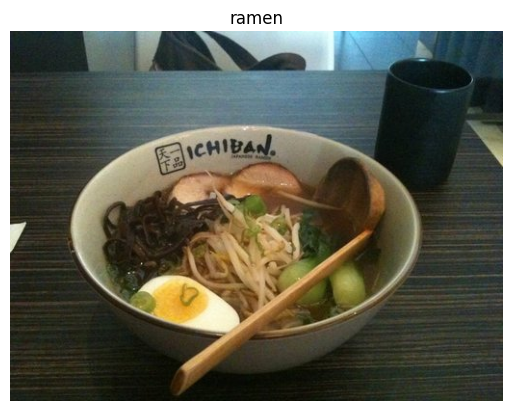

In [18]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names =np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

img = view_rand_img(target_dir = train_dir,
                    target_class= random.choice(class_names))

In [34]:
#preprocess data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_aug = ImageDataGenerator(rescale = 1./255,
                                       rotation_range=0.2,
                                       shear_range = 0.2,
                                       zoom_range=0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.3,
                                       horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

print("Augmented Data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       class_mode = "categorical",
                                                       shuffle = True
                                                       )

print("Test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = "categorical"
                                             )

Augmented Data
Found 7500 images belonging to 10 classes.
Test Data
Found 2500 images belonging to 10 classes.


In [37]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)
                           ),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model7.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

his7 = model7.fit(train_data_aug,
           epochs = 5,
           steps_per_epoch=len(train_data_aug),
           validation_data=test_data,
           validation_steps=len(test_data)
           )

Epoch 1/5
235/235 [==============================] - 633s 3s/step - loss: 2.2036 - accuracy: 0.1892 - val_loss: 2.0539 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 640s 3s/step - loss: 2.1114 - accuracy: 0.2379 - val_loss: 1.9515 - val_accuracy: 0.3072
Epoch 3/5
 15/235 [>.............................] - ETA: 8:27 - loss: 2.1302 - accuracy: 0.2375

KeyboardInterrupt: 

In [40]:
#I cant connect to GPU and is taking far too long, so going to continue with the work.
model7.evaluate(test_data)



79/79 [==============================] - 62s 781ms/step - loss: 1.9764 - accuracy: 0.3044


[1.976386547088623, 0.3043999969959259]

In [43]:
plot_loss(his7) #if we properly had the history, we would see that our model preforms better than random,
#but not phenomenal (0.4) if we did not properly augment the data, we would have overfit the model even more.
#the loss function would suggest that if we continue to train the model over more epochs,
#we could increase accuracy

NameError: name 'his7' is not defined

In [ ]:
#We could keep going, bringing our loss curves closer and improving.
#transfer learning

In [45]:
#using our own image
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
1/1 [==============================] - 0s 37ms/step
[[0.02938005 0.08211951 0.04707661 0.14041732 0.08993711 0.10273116
  0.04039263 0.10297531 0.24649215 0.11847813]]


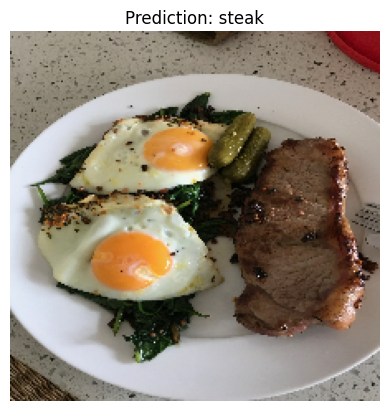

In [61]:
print(class_names)
pred_and_plot(model=model7,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 40ms/step
[[0.03928277 0.05881408 0.06258701 0.09802165 0.09127885 0.1098755
  0.07357834 0.21653989 0.08295442 0.16706751]]


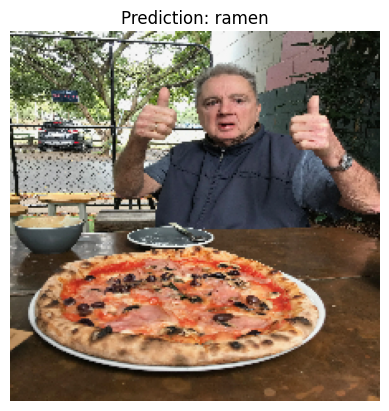

In [63]:
pred_and_plot(model=model7,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 98ms/step
[[0.14041714 0.15516594 0.11381727 0.14804715 0.09379023 0.01235274
  0.11731345 0.10331663 0.05504018 0.06073929]]


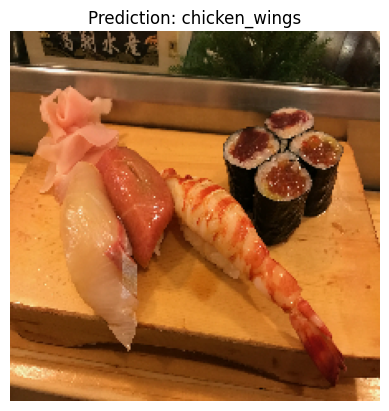

In [65]:
pred_and_plot(model=model7,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 39ms/step
[[0.04614001 0.06944624 0.06011117 0.08785011 0.07436907 0.11037362
  0.09067088 0.1676954  0.14408492 0.14925869]]


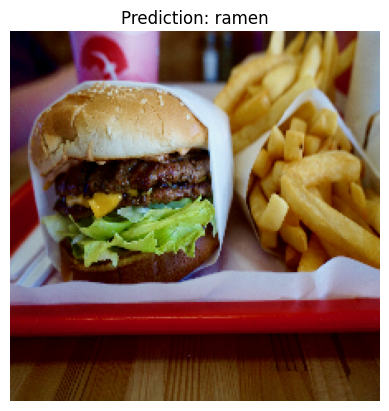

In [66]:
pred_and_plot(model=model7,
              filename="03-hamburger.jpeg",
              class_names=class_names)

In [ ]:
#model preforms poorly on custom images (expected)

In [67]:
model7.save("savedmodel7")